In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import glob
import re
from datetime import datetime

data = pd.read_csv('chicken.csv')
data['As Of Date'] = pd.to_datetime(data['As Of Date'])
data['Username'] = data['Username'].map({'Bojangles1977':'Bojangles','Bojangles':'Bojangles','Wingstop':'Wingstop','BuffaloWildWings':'BuffaloWildWings'})

In [35]:
data

,Ticker Symbol,Entity Name,Unique ID,As Of Date,Username,Checkins,Has App,Were Here Count,Likes,Talking About Count,Facebook Id,Date Added,Date Updated,Ticker Sector,Ticker Industry
0,nasdaq:wing,84579814673,38467323,2018-06-25,Wingstop,26714,False,1789050,1294698,4196,84579814673,2018-06-26 01:30:16,2018-06-26 01:30:16,Consumer Services,Travel & Leisure
1,nasdaq:boja,16910753646,38465876,2018-06-25,Bojangles,1,False,643594,399603,1234,16910753646,2018-06-25 01:43:39,2018-06-25 01:43:39,Consumer Services,Travel & Leisure
2,nasdaq:bwld,9418270899,38465881,2018-06-25,BuffaloWildWings,154359,False,18791624,12571683,42488,9418270899,2018-06-25 01:43:45,2018-06-25 01:43:45,Consumer Services,Travel & Leisure
3,nasdaq:boja,16910753646,38456843,2018-06-13,Bojangles,1,False,641041,399705,585,16910753646,2018-06-13 18:52:33,2018-06-13 18:52:33,Consumer Services,Travel & Leisure
4,nasdaq:bwld,9418270899,38456876,2018-06-13,BuffaloWildWings,154609,False,18740987,12560901,14932,9418270899,2018-06-13 18:52:37,2018-06-13 18:52:37,Consumer Services,Travel & Leisure
5,nasdaq:wing,84579814673,38457774,2018-06-13,Wingstop,26777,False,1783200,1295174,5156,84579814673,2018-06-13 18:54:43,2018-06-13 18:54:43,Consumer Services,Travel & Leisure
6,nasdaq:bwld,9418270899,38447902,2018-06-08,BuffaloWildWings,154623,False,18712832,12562539,13948,9418270899,2018-06-08 17:21:23,2018-06-08 17:21:23,Consumer Services,Travel & Leisure
7,nasdaq:boja,16910753646,38447840,2018-06-08,Bojangles,1,False,639852,399718,884,16910753646,2018-06-08 17:21:17,2018-06-08 17:21:17,Consumer Services,Travel & Leisure
8,nasdaq:wing,84579814673,38449420,2018-06-08,Wingstop,26784,False,1779864,1295005,6404,84579814673,2018-06-08 17:24:21,2018-06-08 17:24:21,Consumer Services,Travel & Leisure
9,nasdaq:bwld,9418270899,38438622,2018-06-06,BuffaloWildWings,154635,False,18704511,12563159,11570,9418270899,2018-06-06 16:22:44,2018-06-06 16:22:44,Consumer Services,Travel & Leisure


In [36]:
data['Ticker Symbol'].unique()

array(['nasdaq:wing', 'nasdaq:boja', 'nasdaq:bwld'], dtype=object)

In [37]:
data['Username'].unique()

array(['Wingstop', 'Bojangles', 'BuffaloWildWings'], dtype=object)

Tickers and associated Usernames:
* 'nasdaq:wing' - Wingstop (Wingstop)
* 'nasdaq:boja' - Bojangles (Bojangles1977, Bojangles)
* 'nasdaq:bwld' - BWW (BuffaloWildWings)

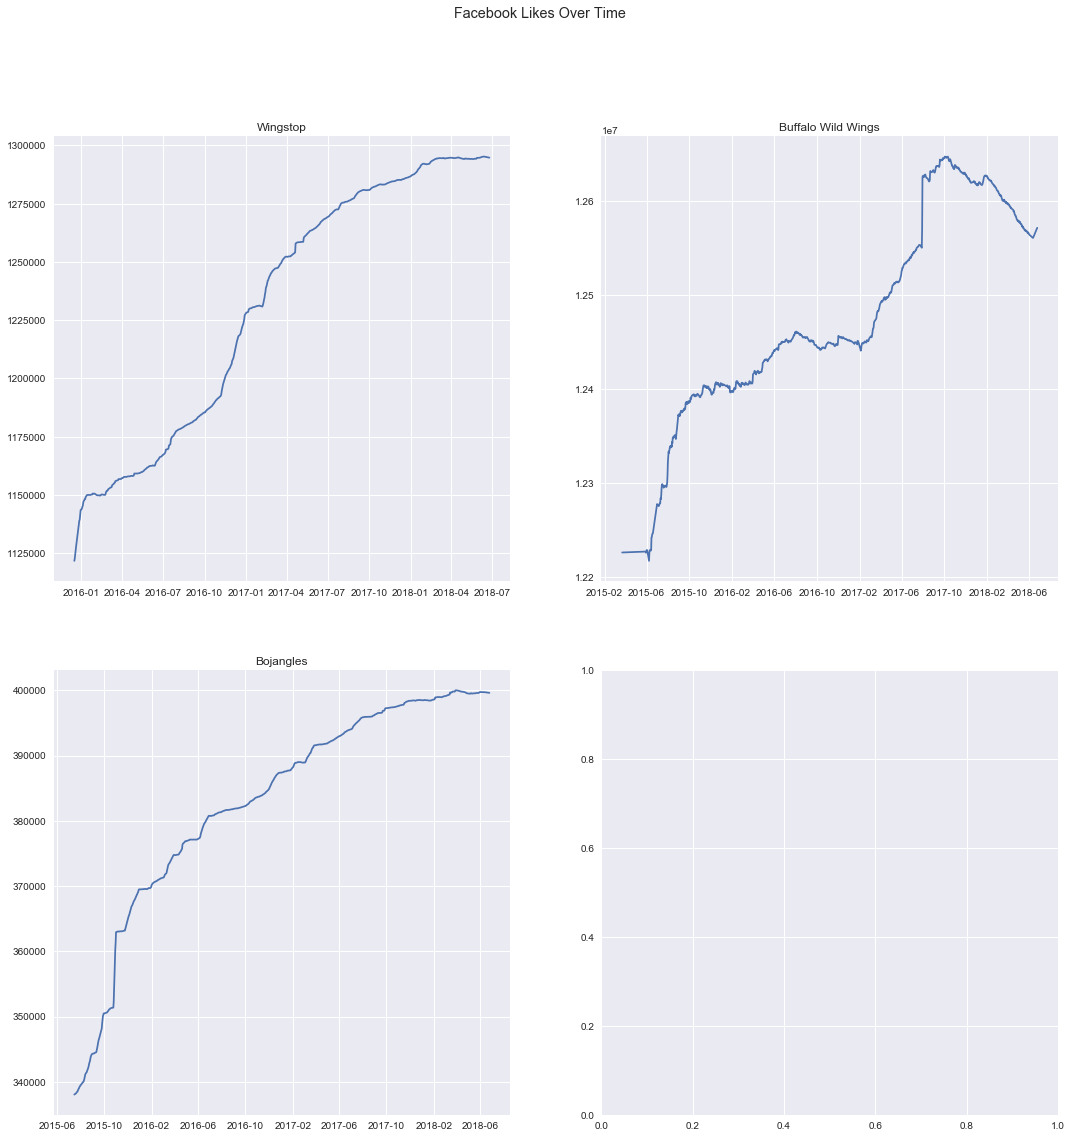

In [49]:
import matplotlib.pyplot as plt
import numpy as np
fig1, f1_axes = plt.subplots(ncols=2, nrows=2,figsize=(18,18))
fig1.suptitle('Facebook Likes Over Time')

plt.subplot(2, 2, 1)
plt.title('Wingstop')
df_wing = data[data['Username']=='Wingstop']
plt.plot(df_wing['As Of Date'],df_wing['Likes'])

plt.subplot(2, 2, 2)
plt.title('Buffalo Wild Wings')
df_bww = data[data['Username']=='BuffaloWildWings']
plt.plot(df_bww['As Of Date'],df_bww['Likes'])

plt.subplot(2, 2, 3)
plt.title('Bojangles')
df_boj = data[data['Username']=='Bojangles']
plt.plot(df_boj['As Of Date'],df_boj['Likes'])

plt.show()

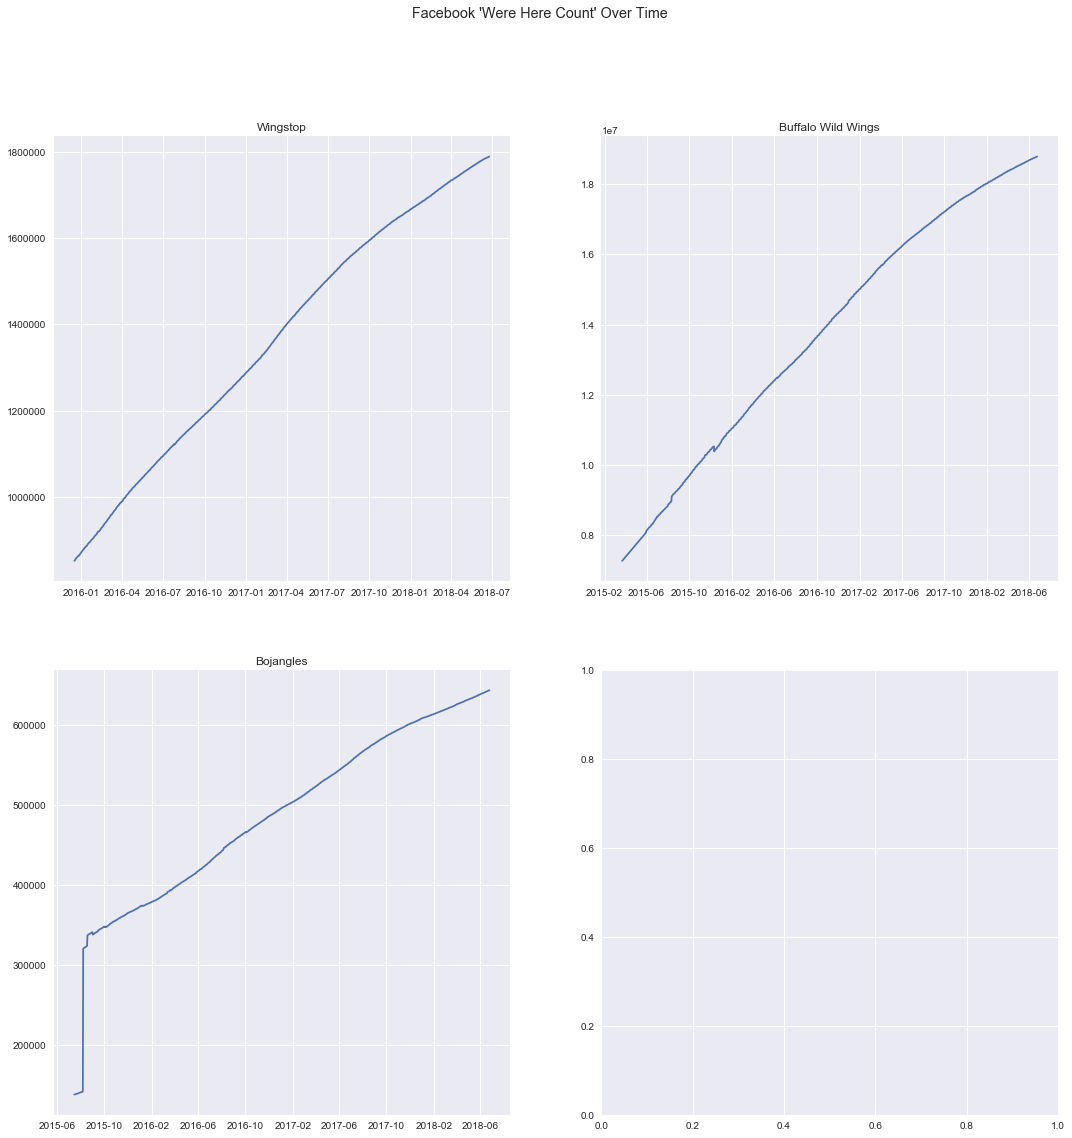

In [50]:

import numpy as np
fig1, f1_axes = plt.subplots(ncols=2, nrows=2,figsize=(18,18))
fig1.suptitle("Facebook 'Were Here Count' Over Time")

plt.subplot(2, 2, 1)
plt.title('Wingstop')
df_jack = data[data['Username']=='Wingstop']
plt.plot(df_jack['As Of Date'],df_jack['Were Here Count'])

plt.subplot(2, 2, 2) 
plt.title('Buffalo Wild Wings')
df_wendys = data[data['Username']=='BuffaloWildWings']
plt.plot(df_wendys['As Of Date'],df_wendys['Were Here Count'])

plt.subplot(2, 2, 3)
plt.title('Bojangles')
df_mcd_lat = data[data['Username']=='Bojangles']
plt.plot(df_mcd_lat['As Of Date'],df_mcd_lat['Were Here Count'])


plt.show()